패키지

In [52]:
# 분석
import pandas as pd
import numpy as np
import scipy.stats as stats
import string

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"

# 머신러닝 패키지
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor

In [53]:
df = pd.read_excel("./data/activity_sample.xlsx")
df

,Unnamed: 0,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,...,day_23_status,day_24_status,day_25_status,day_26_status,day_27_status,day_28_status,day_29_status,day_30_status,day_31_status,change_date
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,ViewEvent,Viewed,DigitalResource,2022-09-14 23:28:53.150,M,...,11,11,44,44,44,44,44,44,999,25
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:09.481,M,...,11,11,44,44,44,44,44,44,999,25
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:09.604,M,...,11,11,44,44,44,44,44,44,999,25
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,NavigationEvent,NavigatedTo,DigitalResource,2022-09-14 23:30:43.752,M,...,11,11,44,44,44,44,44,44,999,25
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,ViewEvent,Viewed,DigitalResource,2022-09-14 23:30:43.883,M,...,11,11,44,44,44,44,44,44,999,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,35,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.026,M,...,1,1,1,1,44,44,44,44,999,27
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,36,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:18.280,M,...,1,1,1,1,44,44,44,44,999,27
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,37,ViewEvent,Viewed,DigitalResource,2022-09-21 10:26:18.366,M,...,1,1,1,1,44,44,44,44,999,27
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,38,NavigationEvent,NavigatedTo,DigitalResource,2022-09-21 10:26:40.089,M,...,1,1,1,1,44,44,44,44,999,27


In [54]:
df.shape

(6476, 45)

In [55]:
for i in df.columns:
    print(i)

Unnamed: 0
userid
learning_seq
mcode
learning_action_seq
event_type
action
object_type
timestamp
gender
grade
memberstatus
memberstatus_change
day_01_status
day_02_status
day_03_status
day_04_status
day_05_status
day_06_status
day_07_status
day_08_status
day_09_status
day_10_status
day_11_status
day_12_status
day_13_status
day_14_status
day_15_status
day_16_status
day_17_status
day_18_status
day_19_status
day_20_status
day_21_status
day_22_status
day_23_status
day_24_status
day_25_status
day_26_status
day_27_status
day_28_status
day_29_status
day_30_status
day_31_status
change_date


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6476 entries, 0 to 6475
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           6476 non-null   int64         
 1   userid               6476 non-null   object        
 2   learning_seq         6476 non-null   int64         
 3   mcode                6476 non-null   object        
 4   learning_action_seq  6476 non-null   int64         
 5   event_type           6476 non-null   object        
 6   action               6476 non-null   object        
 7   object_type          6476 non-null   object        
 8   timestamp            6476 non-null   datetime64[ns]
 9   gender               6476 non-null   object        
 10  grade                6476 non-null   int64         
 11  memberstatus         6476 non-null   int64         
 12  memberstatus_change  6476 non-null   object        
 13  day_01_status        6476 non-nul

In [57]:
df["action"].unique()

array(['Viewed', 'NavigatedTo', 'Started', 'JumpedTo', 'Ended',
       'ChangedVolume', 'Restarted', 'ChangedSpeed', 'Paused', 'Resumed'],
      dtype=object)

In [58]:
df["event_type"].unique()

array(['ViewEvent', 'NavigationEvent', 'MediaEvent'], dtype=object)

중복, 결측치 확인

In [59]:
df["userid"].duplicated().sum()

6446

In [60]:
df["userid"].nunique()

# 30명에 대한 활동 데이터

30

In [61]:
df["userid"].unique()

array(['01cf7916-eb98-4d30-8c81-dd52aa5be060',
       '076bf224-16b8-48ca-b646-752a771b1dcc',
       '2bd83b70-6085-48d1-8433-6bef1f4fa584',
       '3a23c7e1-861a-41ce-a856-f16a4df5a5df',
       '4e478763-9937-4d47-b7da-a0113f860b52',
       '4ef416c9-de60-499e-b971-a780e076991e',
       '5b531894-59c3-4cf3-8fa4-eb1836fbd6b3',
       '676a004e-7c59-4edb-8af1-3bd963b98b29',
       '78d436d5-2adb-489b-bc1c-8c5b85d47d5c',
       '7aa6cf37-81af-4af8-a272-6a850e65e25c',
       '909c25d9-64ef-4e4f-b47f-4df50f02c07f',
       '91749c9e-af85-4f73-b252-2d05c04b508f',
       '943ee87d-d6d7-4ad4-b7dd-4ca171d8107e',
       'a11ea25b-593c-45f4-8c68-8e97b489e53a',
       'a130415d-5d44-4526-94bd-1a0892811572',
       'a3c0a30d-346f-4b58-967b-70ae79302871',
       'a9c80240-7734-401d-bddf-999d869e42a1',
       'b2d3b8c4-e954-4ed2-9078-c6c5493debea',
       'b3ddd47d-5c6f-44ba-9bd6-ff698a742f73',
       'b6d4d557-7343-4b61-8f06-ebbee45a0a81',
       'b8be7534-636b-4304-b3b2-ced246c3c1eb',
       'c25b0

In [62]:
df.isnull().sum()

Unnamed: 0             0
userid                 0
learning_seq           0
mcode                  0
learning_action_seq    0
event_type             0
action                 0
object_type            0
timestamp              0
gender                 0
grade                  0
memberstatus           0
memberstatus_change    0
day_01_status          0
day_02_status          0
day_03_status          0
day_04_status          0
day_05_status          0
day_06_status          0
day_07_status          0
day_08_status          0
day_09_status          0
day_10_status          0
day_11_status          0
day_12_status          0
day_13_status          0
day_14_status          0
day_15_status          0
day_16_status          0
day_17_status          0
day_18_status          0
day_19_status          0
day_20_status          0
day_21_status          0
day_22_status          0
day_23_status          0
day_24_status          0
day_25_status          0
day_26_status          0
day_27_status          0


결측치가 없다?

In [63]:
df["object_type"].unique()

array(['DigitalResource', 'VideoObject', 'WebPage'], dtype=object)

In [64]:
df["grade"].unique()

# 전부 5학년에 대한 데이터
# 즉 5학년 30명에 대한 자료이다

array([5], dtype=int64)

전처리

In [65]:
# 사람은 30명, 그 인원을 보다 쉽게 식별하기 위해서 변환시도

# 유니크 userid 추출
unique_userids = df["userid"].unique()

# stu1 ~ stu30까지의 리스트 생성
stu_labels = [f"stu{i}" for i in range(1, 31)]

# 유니크 userid와 stu 라벨을 매핑하는 딕셔너리 생성
userid_to_stu = dict(zip(unique_userids, stu_labels))

# userid를 stu 라벨로 변환한 새로운 컬럼 생성
df["userid_stu"] = df["userid"].map(userid_to_stu)

# 결과 확인
print(df[["userid", "userid_stu"]].head())

                                 userid userid_stu
0  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
1  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
2  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
3  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1
4  01cf7916-eb98-4d30-8c81-dd52aa5be060       stu1


'_'0으로 바꾸기

In [66]:
df.replace("-", 0, inplace=True)

In [67]:
userid_counts = df["userid_stu"].value_counts()

# Box-Cox 변환 적용 (0 이상의 빈도수여야 적용 가능)
boxcox_transformed, _ = stats.boxcox(userid_counts)

# Box-Cox 변환된 값을 DataFrame에 추가
df_boxcox = pd.DataFrame(
    {
        "userid_stu": userid_counts.index,
        "original_count": userid_counts.values,
        "boxcox_count": boxcox_transformed,
    }
)

# df에 병합 (필요할 경우)
df = df.merge(df_boxcox, on="userid_stu")

# 결과 확인
print(df.head())

   Unnamed: 0                                userid  learning_seq  \
0        6338  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
1        6339  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
2        6340  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
3        6341  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
4        6342  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   

          mcode  learning_action_seq       event_type       action  \
0  T0TE52U01003                    1        ViewEvent       Viewed   
1  T0TE52U01003                    2  NavigationEvent  NavigatedTo   
2  T0TE52U01003                    3        ViewEvent       Viewed   
3  T0TE52U01003                    4  NavigationEvent  NavigatedTo   
4  T0TE52U01003                    5        ViewEvent       Viewed   

       object_type               timestamp gender  ...  day_26_status  \
0  DigitalResource 2022-09-14 23:28:53.150      M  ...             44   
1  DigitalResource

In [68]:
# 콘텐츠 타입에 따라 범주형 자료를 변환
df["object_type"][df["object_type"] == "DigitalResource"] = 2
df["object_type"][df["object_type"] == "VideoObject"] = 1
df["object_type"][df["object_type"] == "WebPage"] = 0

C:\Users\dongi\AppData\Local\Temp\ipykernel_2828\2167515949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["object_type"][df["object_type"] == "DigitalResource"] = 2
C:\Users\dongi\AppData\Local\Temp\ipykernel_2828\2167515949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["object_type"][df["object_type"] == "VideoObject"] = 1
C:\Users\dongi\AppData\Local\Temp\ipykernel_2828\2167515949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [69]:
df["event_type"][df["event_type"] == "ViewEvent"] = 0
df["event_type"][df["event_type"] == "NavigationEvent"] = 1
df["event_type"][df["event_type"] == "MediaEvent"] = 2

C:\Users\dongi\AppData\Local\Temp\ipykernel_2828\3503880204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["event_type"][df["event_type"] == "ViewEvent"] = 0
C:\Users\dongi\AppData\Local\Temp\ipykernel_2828\3503880204.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["event_type"][df["event_type"] == "NavigationEvent"] = 1
C:\Users\dongi\AppData\Local\Temp\ipykernel_2828\3503880204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [70]:
df["object_type"]

0       2
1       2
2       2
3       2
4       2
       ..
6471    2
6472    2
6473    2
6474    2
6475    2
Name: object_type, Length: 6476, dtype: object

In [71]:
num_ids = len(df["mcode"].unique())
np.random.seed(42)  # 재현 가능성을 위해 시드 설정
random_numbers = np.random.randint(low=1000, high=9999, size=num_ids)

# 콘텐츠 ID와 랜덤 숫자를 매핑합니다.
content_to_number = dict(zip(df["mcode"].unique(), random_numbers))

# 매핑을 데이터프레임에 적용합니다.
df["mcode_mapped"] = df["mcode"].map(content_to_number)

print(df)

      Unnamed: 0                                userid  learning_seq  \
0           6338  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
1           6339  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
2           6340  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
3           6341  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
4           6342  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
...          ...                                   ...           ...   
6471        3081  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6472        3082  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6473        3083  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6474        3084  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6475        3085  f157a6f8-c680-42bf-8b48-03744367f7b1             2   

             mcode  learning_action_seq event_type       action object_type  \
0     T0TE52U01003                    1          0      

EDA

In [72]:
# plt.figure(figsize=(20, 10))

# sns.countplot(x="userid_stu", data=df, hue="object_type")
# plt.title("학습량 + object_type")


# # 플롯을 표시
# plt.show()

30명에 대한 자료가 편향적임

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\Users\dongi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dongi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dongi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyp

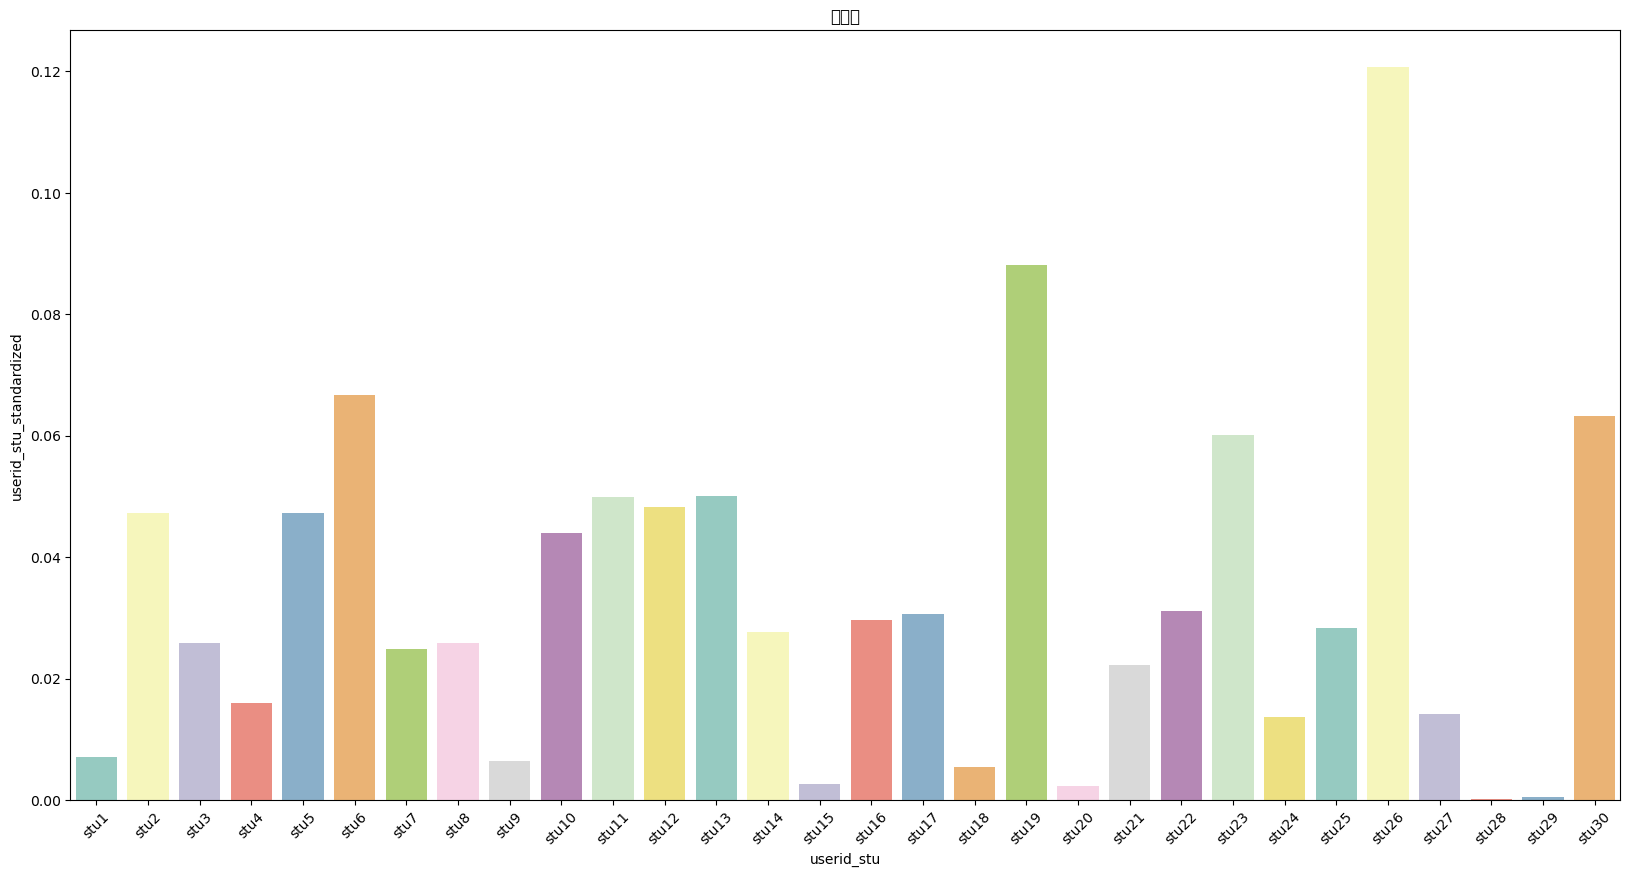

In [73]:
# 전체 행의 수
total_count = len(df)

# 각 stu 라벨의 빈도를 표준화하여 비율 계산
df["userid_stu_standardized"] = df["userid_stu"].map(
    df["userid_stu"].value_counts() / total_count
)

# 표준화된 값으로 플롯을 그림
plt.figure(figsize=(20, 10))
sns.barplot(x="userid_stu", y="userid_stu_standardized", data=df, palette="Set3")

# x축 라벨 회전

plt.xticks(rotation=45)
plt.title("학습량")
# 표준화된 플롯을 표시
plt.show()

c:\Users\dongi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumG

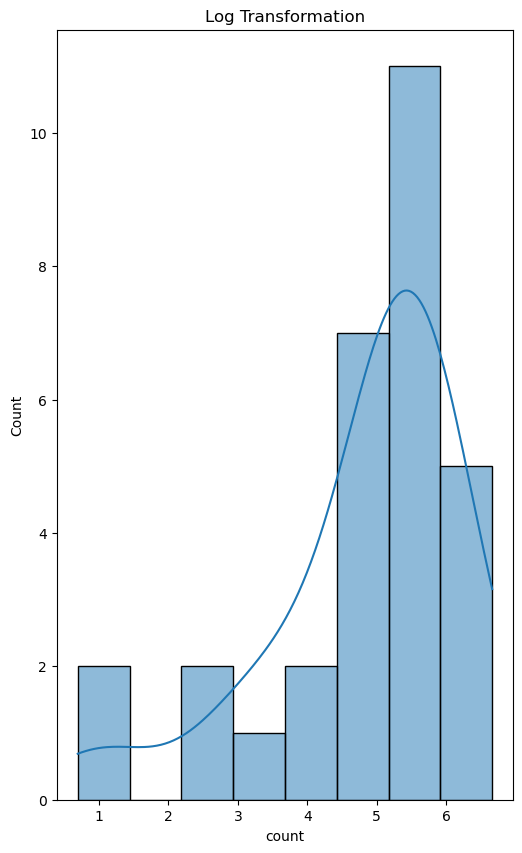

In [74]:
# Box-Cox 변환은 양수 값에만 적용 가능

userid_counts = df["userid_stu"].value_counts()
log_transformed = np.log1p(userid_counts)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.histplot(log_transformed, kde=True)
plt.title("Log Transformation")
plt.show()

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

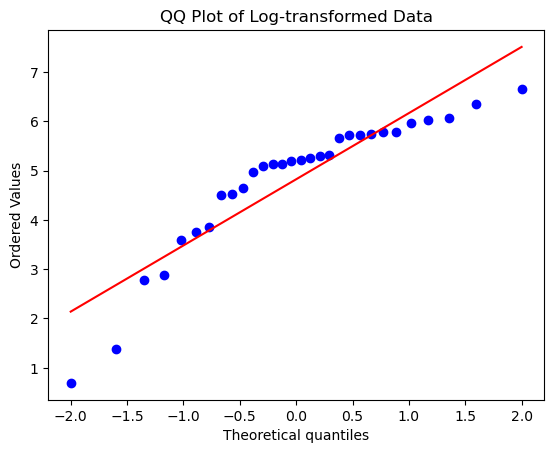

In [75]:
stats.probplot(log_transformed, dist="norm", plot=plt)
plt.title("QQ Plot of Log-transformed Data")
plt.show()

c:\Users\dongi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Box-Cox Transformation')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

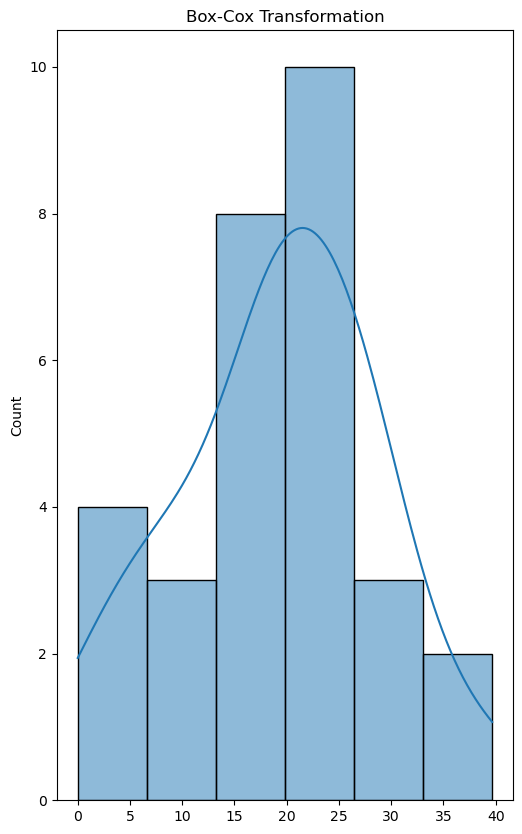

In [76]:
# Box-Cox 변환은 양수 값에만 적용 가능
boxcox_transformed, _ = stats.boxcox(userid_counts)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 2)
sns.histplot(boxcox_transformed, kde=True)
plt.title("Box-Cox Transformation")

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

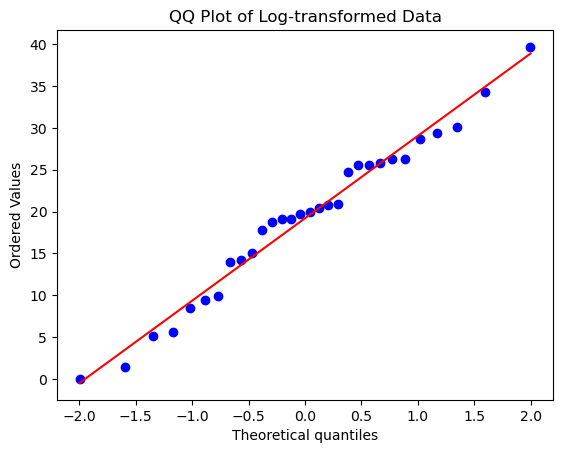

In [77]:
stats.probplot(boxcox_transformed, dist="norm", plot=plt)
plt.title("QQ Plot of Log-transformed Data")
plt.show()

In [78]:
df["boxcox_count"]

0        9.891947
1        9.891947
2        9.891947
3        9.891947
4        9.891947
          ...    
6471    29.359462
6472    29.359462
6473    29.359462
6474    29.359462
6475    29.359462
Name: boxcox_count, Length: 6476, dtype: float64

In [79]:
df["time_diff"] = df.groupby("mcode")["timestamp"].diff()

In [80]:
df["time_diff"] = df["time_diff"].fillna(pd.Timedelta(seconds=0))

# timedelta를 초로 변환
df["time_diff_seconds"] = df["time_diff"].dt.total_seconds().astype(int)

# timedelta를 밀리초로 변환
df["time_diff_milliseconds"] = (df["time_diff"].dt.total_seconds() * 1000).astype(int)

# timedelta를 분으로 변환
df["time_diff_minutes"] = (df["time_diff"].dt.total_seconds() / 60).astype(int)

# timedelta를 시간으로 변환
df["time_diff_hours"] = (df["time_diff"].dt.total_seconds() / 3600).astype(int)

print(df)

      Unnamed: 0                                userid  learning_seq  \
0           6338  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
1           6339  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
2           6340  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
3           6341  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
4           6342  01cf7916-eb98-4d30-8c81-dd52aa5be060             1   
...          ...                                   ...           ...   
6471        3081  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6472        3082  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6473        3083  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6474        3084  f157a6f8-c680-42bf-8b48-03744367f7b1             2   
6475        3085  f157a6f8-c680-42bf-8b48-03744367f7b1             2   

             mcode  learning_action_seq event_type       action object_type  \
0     T0TE52U01003                    1          0      

In [81]:
# plt.figure(figsize=(20, 10))
# sns.barplot(x="userid_stu", y="time_diff", data=df, palette="viridis")
# plt.title("Content-wise Duration")
# plt.xlabel("Content ID")
# plt.ylabel("Duration")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

학생이 학습량에 대한 부분을 박스콕스 변환까지 실시

모델 생성

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6476 entries, 0 to 6475
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unnamed: 0               6476 non-null   int64          
 1   userid                   6476 non-null   object         
 2   learning_seq             6476 non-null   int64          
 3   mcode                    6476 non-null   object         
 4   learning_action_seq      6476 non-null   int64          
 5   event_type               6476 non-null   object         
 6   action                   6476 non-null   object         
 7   object_type              6476 non-null   object         
 8   timestamp                6476 non-null   datetime64[ns] 
 9   gender                   6476 non-null   object         
 10  grade                    6476 non-null   int64          
 11  memberstatus             6476 non-null   int64          
 12  memberstatus_change 

In [83]:
df

,Unnamed: 0,userid,learning_seq,mcode,learning_action_seq,event_type,action,object_type,timestamp,gender,...,userid_stu,original_count,boxcox_count,mcode_mapped,userid_stu_standardized,time_diff,time_diff_seconds,time_diff_milliseconds,time_diff_minutes,time_diff_hours
0,6338,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,1,0,Viewed,2,2022-09-14 23:28:53.150,M,...,stu1,46,9.891947,8270,0.007103,0 days 00:00:00,0,0,0,0
1,6339,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,2,1,NavigatedTo,2,2022-09-14 23:30:09.481,M,...,stu1,46,9.891947,8270,0.007103,0 days 00:01:16.331000,76,76331,1,0
2,6340,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,3,0,Viewed,2,2022-09-14 23:30:09.604,M,...,stu1,46,9.891947,8270,0.007103,0 days 00:00:00.123000,0,123,0,0
3,6341,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,4,1,NavigatedTo,2,2022-09-14 23:30:43.752,M,...,stu1,46,9.891947,8270,0.007103,0 days 00:00:34.148000,34,34148,0,0
4,6342,01cf7916-eb98-4d30-8c81-dd52aa5be060,1,T0TE52U01003,5,0,Viewed,2,2022-09-14 23:30:43.883,M,...,stu1,46,9.891947,8270,0.007103,0 days 00:00:00.131000,0,131,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6471,3081,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,35,0,Viewed,2,2022-09-21 10:26:18.026,M,...,stu30,410,29.359462,2528,0.063311,0 days 00:00:15.816000,15,15816,0,0
6472,3082,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,36,1,NavigatedTo,2,2022-09-21 10:26:18.280,M,...,stu30,410,29.359462,2528,0.063311,0 days 00:00:00.254000,0,254,0,0
6473,3083,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,37,0,Viewed,2,2022-09-21 10:26:18.366,M,...,stu30,410,29.359462,2528,0.063311,0 days 00:00:00.086000,0,86,0,0
6474,3084,f157a6f8-c680-42bf-8b48-03744367f7b1,2,T0NE52U10001,38,1,NavigatedTo,2,2022-09-21 10:26:40.089,M,...,stu30,410,29.359462,2528,0.063311,0 days 00:00:21.723000,21,21723,0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6476 entries, 0 to 6475
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Unnamed: 0               6476 non-null   int64          
 1   userid                   6476 non-null   object         
 2   learning_seq             6476 non-null   int64          
 3   mcode                    6476 non-null   object         
 4   learning_action_seq      6476 non-null   int64          
 5   event_type               6476 non-null   object         
 6   action                   6476 non-null   object         
 7   object_type              6476 non-null   object         
 8   timestamp                6476 non-null   datetime64[ns] 
 9   gender                   6476 non-null   object         
 10  grade                    6476 non-null   int64          
 11  memberstatus             6476 non-null   int64          
 12  memberstatus_change 

In [85]:
X = df.loc[
    :,
    [
        "learning_action_seq",
        "learning_seq",
        "event_type",
        "object_type",
        "mcode_mapped",
        "time_diff_seconds",
    ],
]

y = df["change_date"]


# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [86]:
# 4. 모델 선택 및 학습
# RandomForestRegressor 모델 사용
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)

# 5. 모델 평가
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.6550925925925926
0.9467181467181467


In [87]:
model.feature_importances_

array([0.19304549, 0.2132433 , 0.01717879, 0.00809101, 0.45528213,
       0.11315927])

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

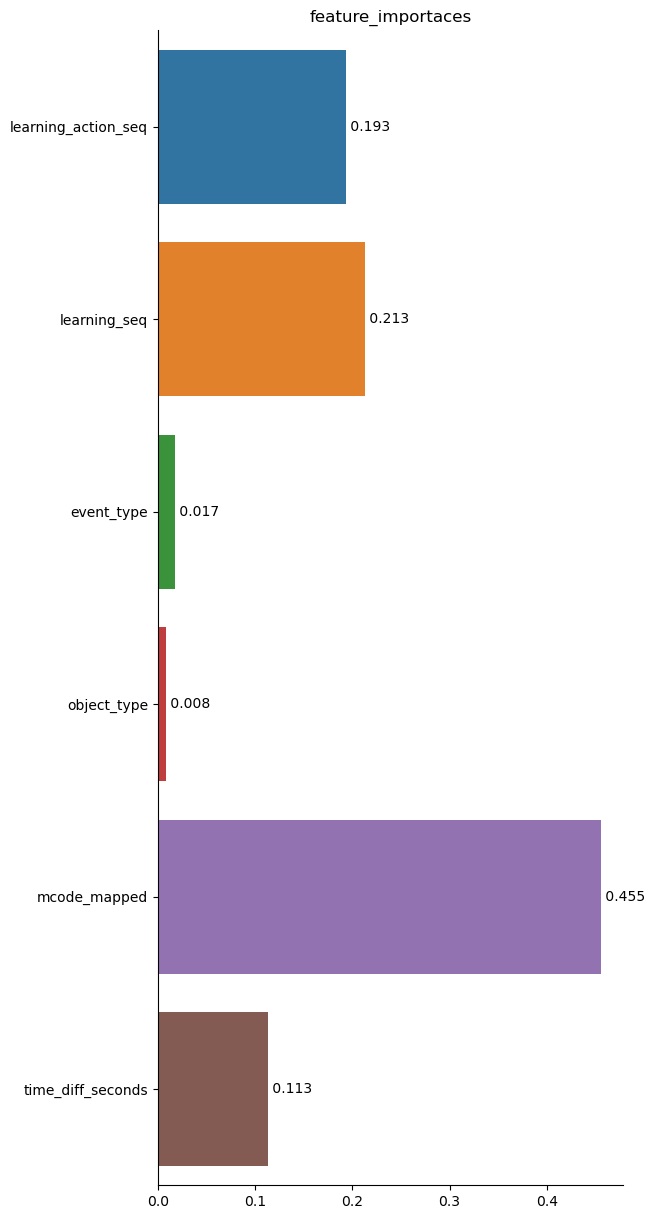

In [88]:
plt.figure(figsize=(6, 15))
ax = sns.barplot(x=model.feature_importances_, y=X.columns)
ax.bar_label(ax.containers[0], fmt=" %.3f")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.title("feature_importaces")
plt.show()

In [89]:
y_pred = model.predict(X_test)
mat = metrics.confusion_matrix(y_test, y_pred)
pd.DataFrame(mat)

,0,1,2,3,4,5,6,7,8,9,10,11
0,43,1,0,0,0,1,6,1,1,0,0,1
1,2,155,11,22,1,11,8,1,8,1,7,3
2,2,14,60,6,0,7,11,0,2,1,0,1
3,0,24,4,97,0,3,11,0,14,0,0,6
4,0,0,0,0,1,1,1,0,0,0,0,0
5,0,5,7,2,0,105,22,0,15,1,0,6
6,4,15,6,10,1,9,124,0,7,2,0,9
7,0,1,1,1,0,0,2,3,0,0,0,5
8,1,13,0,13,3,10,9,2,138,1,0,5
9,0,2,1,1,0,0,0,0,2,12,0,2
